In [ ]:
#Using Google Collab so we can use the Collab Pro subcription to run the calculation faster
from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/My Drive/Deeplearning/"

Mounted at /content/drive


**Topic Modelling**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer




/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


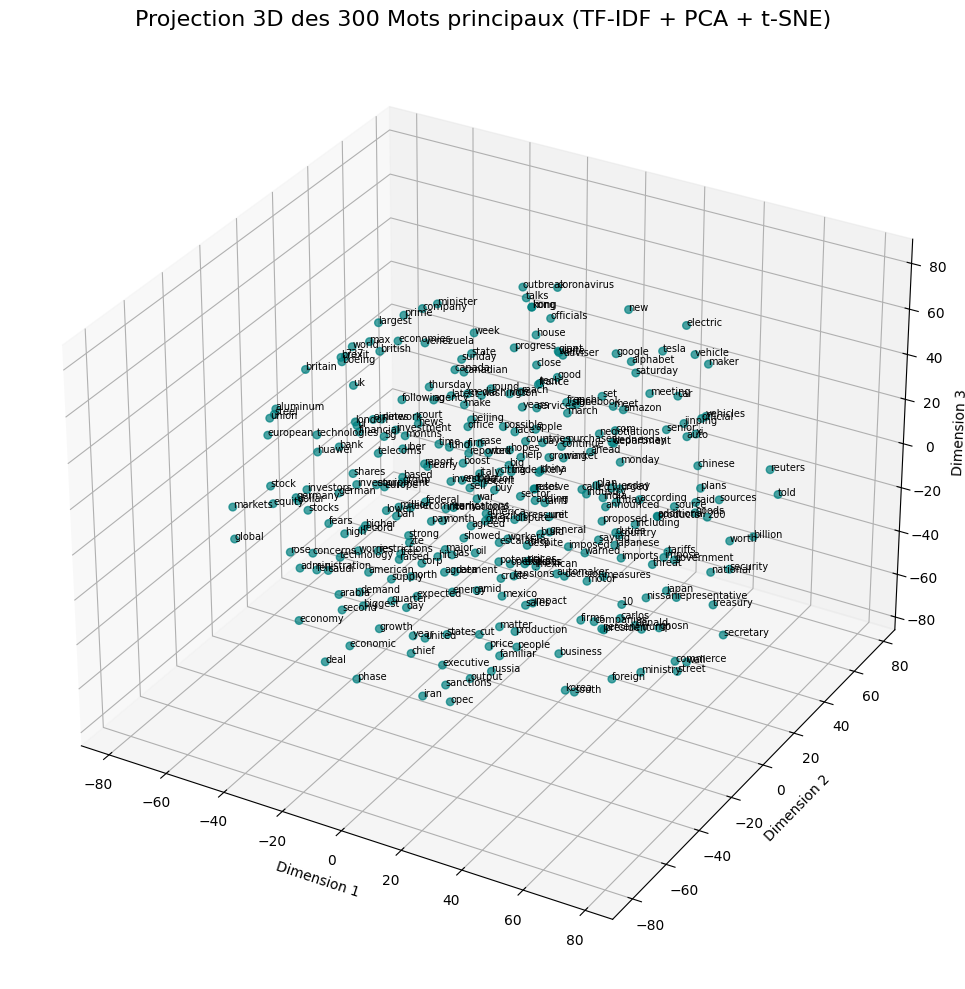

In [ ]:


# data
df = pd.read_csv(PATH+'Output/paired_countries_with_sentiment.csv')
texts = df['Description'].dropna().tolist()

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# Choisir les mots les plus importants
word_importances = np.asarray(X_tfidf.sum(axis=0)).flatten()
top_word_indices = word_importances.argsort()[-300:]  # Top 300 mots
X_words = X_tfidf[:, top_word_indices].T.toarray()
words = vectorizer.get_feature_names_out()[top_word_indices]

# PCA puis t-SNE
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_words)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plot 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], alpha=0.7, s=30, c='teal')

# Ajouter les labels pour les mots sélectionnés
for i, word in enumerate(words):
    ax.text(X_tsne[i, 0], X_tsne[i, 1], X_tsne[i, 2], word, size=7)

ax.set_title('Projection 3D des 300 Mots principaux (TF-IDF + PCA + t-SNE)', fontsize=16)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.tight_layout()
plt.show()


**CHN-USA**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


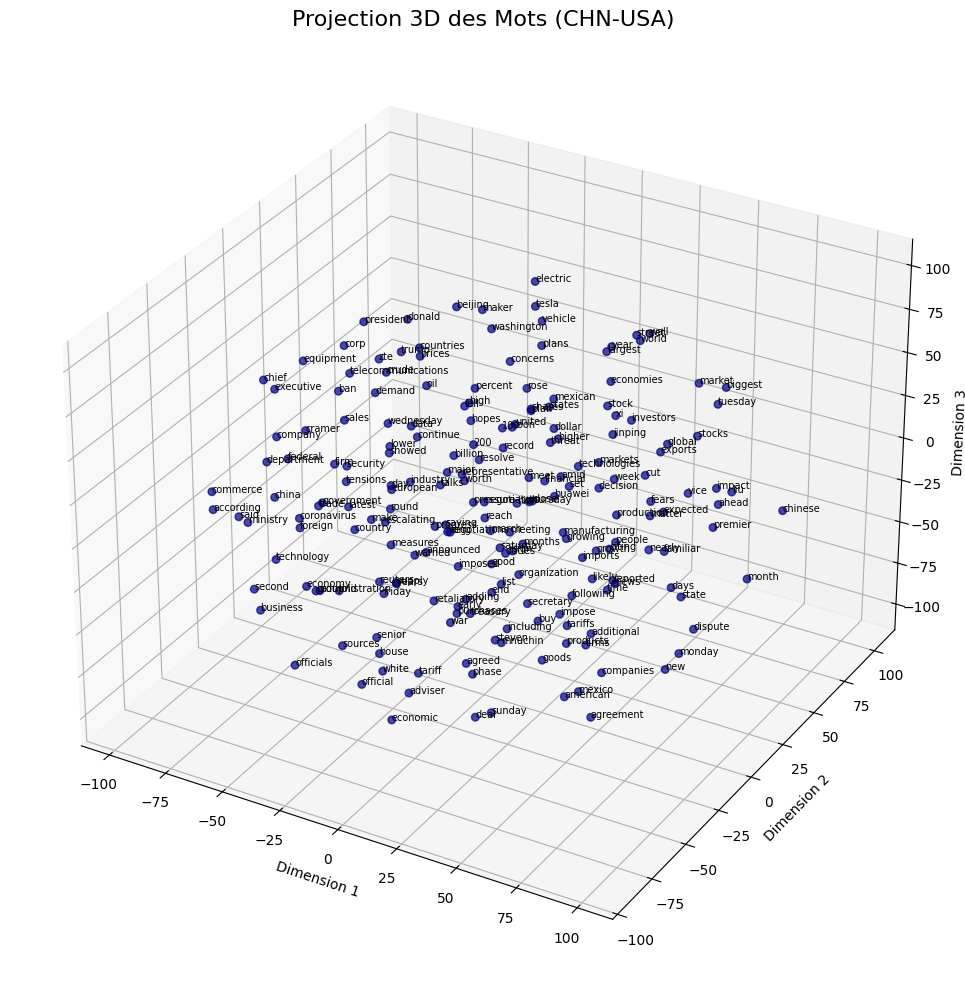

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Charger les données
df = pd.read_csv(PATH+'Output/paired_countries_with_sentiment.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrer sur la paire CHN-USA
df_chn_usa = df[df['country_pair'] == 'CHN-USA']
texts = df_chn_usa['Description'].dropna().tolist()

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# Choisir les mots importants
word_importances = np.asarray(X_tfidf.sum(axis=0)).flatten()
top_word_indices = word_importances.argsort()[-200:]  # Top 200 mots seulement
X_words = X_tfidf[:, top_word_indices].T.toarray()
words = vectorizer.get_feature_names_out()[top_word_indices]

# PCA + t-SNE
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_words)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plot 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], alpha=0.7, s=30, c='navy')

for i, word in enumerate(words):
    ax.text(X_tsne[i, 0], X_tsne[i, 1], X_tsne[i, 2], word, size=7)

ax.set_title('Projection 3D des Mots (CHN-USA)', fontsize=16)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.tight_layout()
plt.show()


In [ ]:
import spacy

# Charger spaCy anglais
nlp = spacy.load('en_core_web_sm')

# Charger les données
df = pd.read_csv(PATH+'Output/paired_countries_with_sentiment.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrer sur CHN-USA
df_chn_usa = df[df['country_pair'] == 'CHN-USA']
texts_chn_usa = df_chn_usa['Description'].dropna().tolist()

# Fonction pour nettoyer les textes : retirer les noms propres
def clean_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ != 'PROPN'])

# Appliquer la fonction de nettoyage
texts_cleaned = [clean_text(text) for text in texts_chn_usa]

# Vectorisation
vectorizer = CountVectorizer(max_df=0.95, min_df=5)
X_clean = vectorizer.fit_transform(texts_cleaned)

# LDA avec un seul topic
lda = LatentDirichletAllocation(n_components=1, random_state=42)
lda.fit(X_clean)

# Fonction pour afficher les mots clés
def display_single_topic(model, feature_names, no_top_words=10):
    topic = model.components_[0]
    print("\n TOPIC PRINCIPAL CHN-USA (sans noms propres) :")
    print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Affichage
display_single_topic(lda, vectorizer.get_feature_names_out(), no_top_words=10)



 TOPIC PRINCIPAL CHN-USA (sans noms propres) :
trade | say | tariff | chinese | deal | talk | war | good | company | billion


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

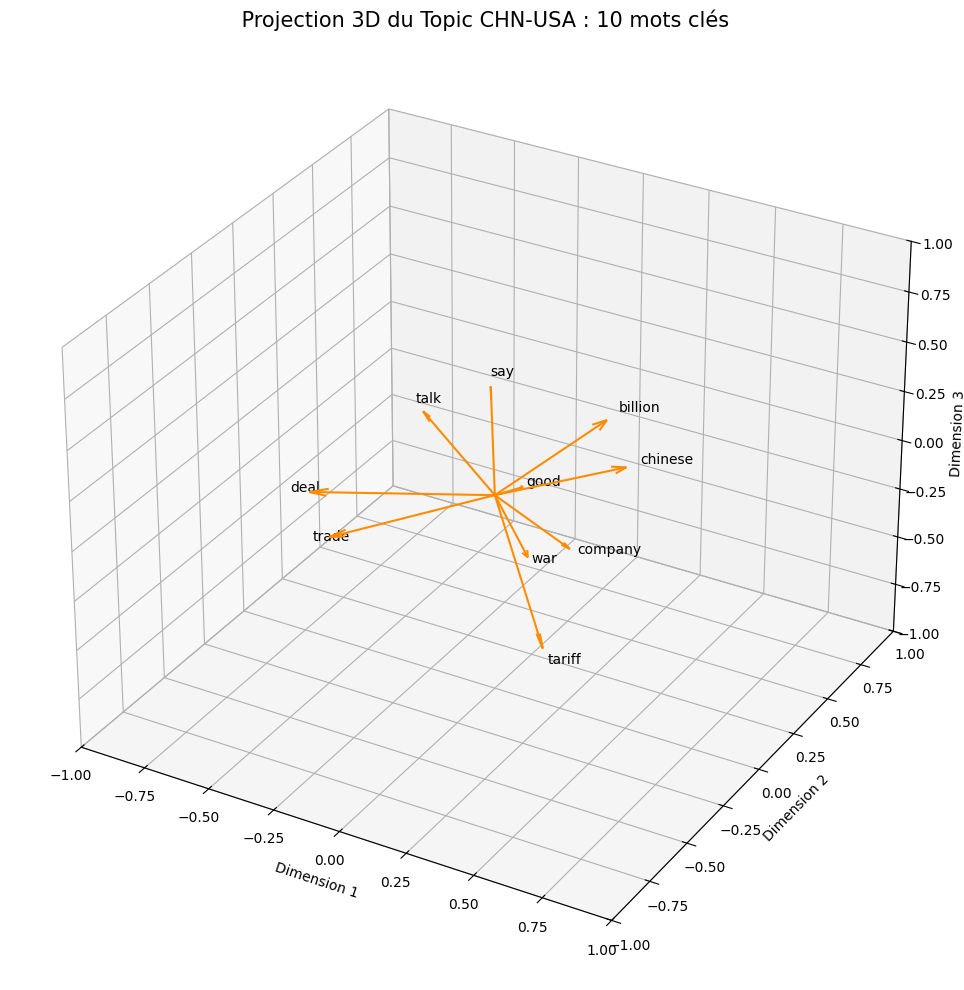

In [ ]:
# 1. Liste des mots
words = ["trade", "say", "tariff", "chinese", "deal", "talk", "war", "good", "company", "billion"]

# 2. Charger SentenceTransformer rapide
model = SentenceTransformer('all-MiniLM-L6-v2')

# 3. Embedding des mots
embeddings = model.encode(words)

# 4. Normaliser pour projeter joliment
embeddings_norm = normalize(embeddings)

# 5. Réduction dimensionnelle en 3D
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(embeddings_norm)

# 6. Plot 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Origine pour les vecteurs
origin = np.zeros((3,))

# Tracer les vecteurs pour chaque mot
for i, word in enumerate(words):
    ax.quiver(*origin, *X_reduced[i], arrow_length_ratio=0.1, color='darkorange')
    ax.text(X_reduced[i, 0]*1.1, X_reduced[i, 1]*1.1, X_reduced[i, 2]*1.1, word, color='black', fontsize=10)

# Paramètres du plot
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title(' Projection 3D du Topic CHN-USA : 10 mots clés', fontsize=15)
plt.tight_layout()
plt.show()


**IRN-USA**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


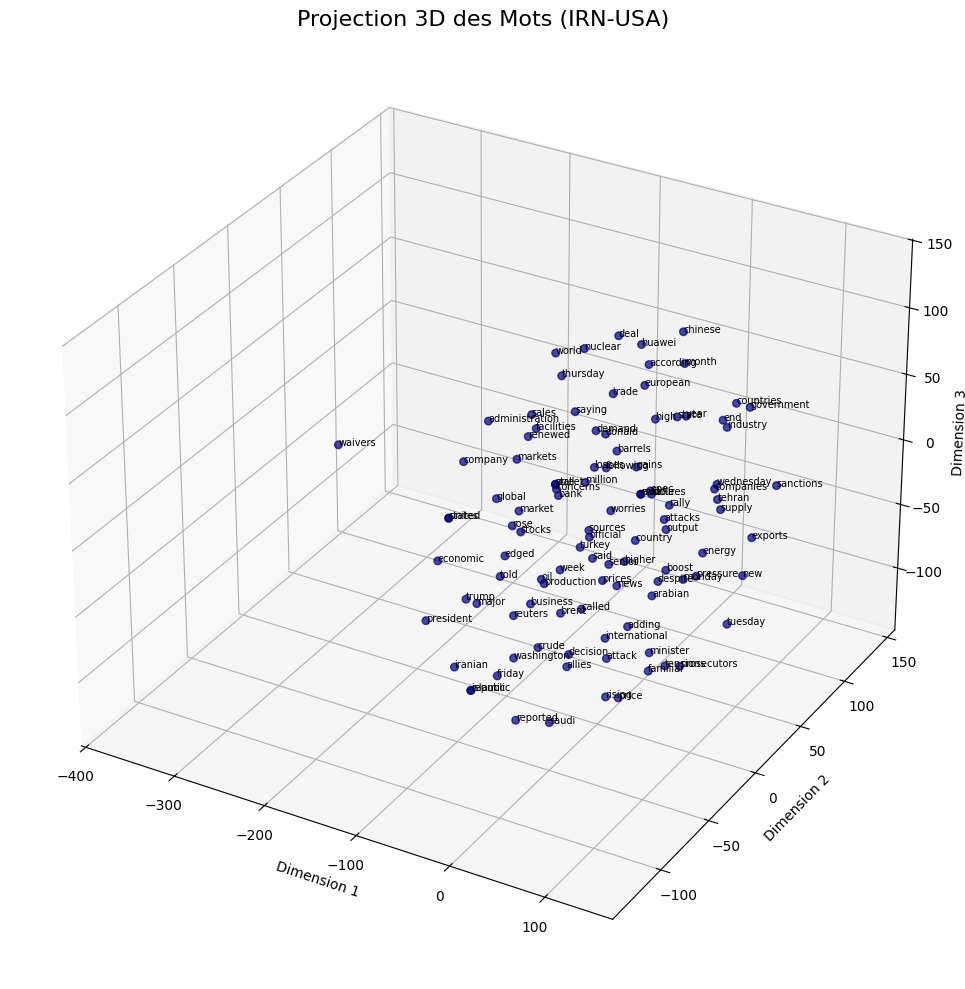

In [ ]:
# Charger les données
df = pd.read_csv(PATH+'Output/paired_countries_with_sentiment.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrer sur la paire
df_irn_usa = df[df['country_pair'] == 'IRN-USA']
texts = df_irn_usa['Description'].dropna().tolist()



# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# Choisir les mots importants
word_importances = np.asarray(X_tfidf.sum(axis=0)).flatten()
top_word_indices = word_importances.argsort()[-200:]  # Top 200 mots seulement
X_words = X_tfidf[:, top_word_indices].T.toarray()
words = vectorizer.get_feature_names_out()[top_word_indices]

# PCA + t-SNE
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_words)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plot 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], alpha=0.7, s=30, c='navy')

for i, word in enumerate(words):
    ax.text(X_tsne[i, 0], X_tsne[i, 1], X_tsne[i, 2], word, size=7)

ax.set_title('Projection 3D des Mots (IRN-USA)', fontsize=16)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.tight_layout()
plt.show()


In [ ]:
# Charger spaCy anglais
nlp = spacy.load('en_core_web_sm')

# Charger les données
df = pd.read_csv(PATH+'Output/paired_countries_with_sentiment.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrer sur CHN-USA
df_chn_usa = df[df['country_pair'] == 'IRN-USA']
texts_chn_usa = df_chn_usa['Description'].dropna().tolist()

# Fonction pour nettoyer les textes : retirer les noms propres
def clean_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ != 'PROPN'])

# Appliquer la fonction de nettoyage
texts_cleaned = [clean_text(text) for text in texts_chn_usa]

# Vectorisation
vectorizer = CountVectorizer(max_df=0.95, min_df=5)
X_clean = vectorizer.fit_transform(texts_cleaned)

# LDA avec un seul topic
lda = LatentDirichletAllocation(n_components=1, random_state=42)
lda.fit(X_clean)

# Fonction pour afficher les mots clés
def display_single_topic(model, feature_names, no_top_words=10):
    topic = model.components_[0]
    print("\n TOPIC PRINCIPAL IRN-USA (sans noms propres) :")
    print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Affichage
display_single_topic(lda, vectorizer.get_feature_names_out(), no_top_words=10)




 TOPIC PRINCIPAL IRN-USA (sans noms propres) :
oil | sanction | say | price | crude | market | iranian | global | company | export


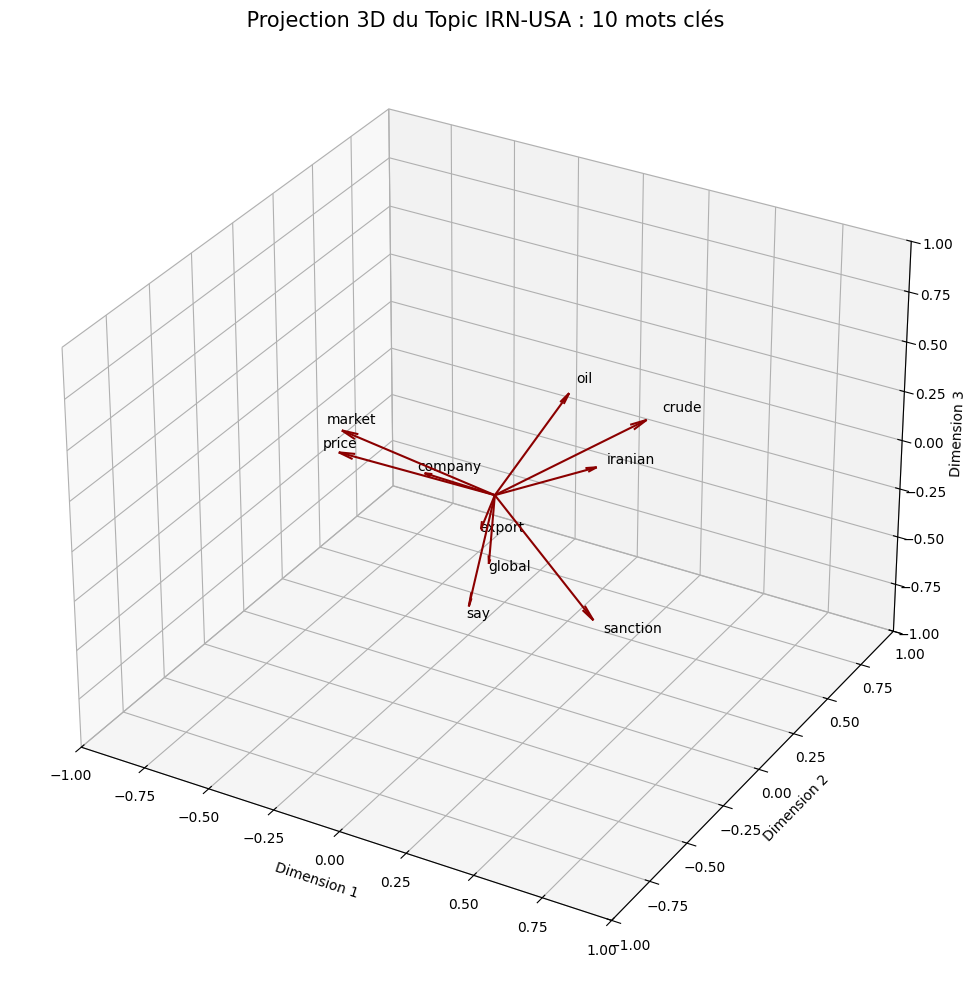

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer
import numpy as np

# 1. Liste des mots IRN-USA
words_iran = ["oil", "sanction", "say", "price", "crude", "market", "iranian", "global", "export", "company"]

# 2. Charger SentenceTransformer rapide
model = SentenceTransformer('all-MiniLM-L6-v2')

# 3. Embedding des mots
embeddings_iran = model.encode(words_iran)

# 4. Normaliser pour uniformiser les directions
embeddings_norm_iran = normalize(embeddings_iran)

# 5. Réduction dimensionnelle en 3D
pca = PCA(n_components=3)
X_reduced_iran = pca.fit_transform(embeddings_norm_iran)

# 6. Plot 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Origine pour les vecteurs
origin = np.zeros((3,))

# Tracer les vecteurs pour chaque mot
for i, word in enumerate(words_iran):
    ax.quiver(*origin, *X_reduced_iran[i], arrow_length_ratio=0.1, color='darkred')
    ax.text(X_reduced_iran[i, 0]*1.1, X_reduced_iran[i, 1]*1.1, X_reduced_iran[i, 2]*1.1, word, color='black', fontsize=10)

# Paramètres du plot
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title(' Projection 3D du Topic IRN-USA : 10 mots clés', fontsize=15)
plt.tight_layout()
plt.show()
